In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from codebook import get_codebook, print_codebook_by_category
from ESS import *
# R package:   https://cran.r-project.org/web/packages/essurvey/vignettes/intro_ess.html

In [2]:
# Download SPSS from https://www.europeansocialsurvey.org/download.html?file=ESS9e01_2&y=2018
df_9 = load_pkl_or_SPSS('E:/tmp/ESS/ess9e01_2.sav')
cb_9, cb_9_flat = get_codebook('E:/playground/ESS/codebooks/ESS9')
drop_country_specific_columns(df_9, cb_9_flat)
drop_mostly_null_columns(df_9)

admin.txt
country.txt
gender.txt
justfair.txt
media.txt
politics.txt
sociodemo.txt
timing.txt
values.txt
weight.txt
wellb.txt


In [3]:
df_8 = load_pkl_or_SPSS('E:/tmp/ESS/ess8e02_1.sav')
cb_8, cb_8_flat = get_codebook('E:/playground/ESS/codebooks/ESS8')
drop_country_specific_columns(df_8, cb_8_flat)
drop_mostly_null_columns(df_8)

admin.txt
climatech.txt
country.txt
gender.txt
media.txt
politics.txt
sociodemo.txt
values.txt
weights.txt
welfare.txt
wellbeing.txt


In [4]:
nine_not_in_8 = select_columns(df_9, df_8, cb_9_flat)
in_both = [col for col in df_9.columns if col in df_8.columns]
if False:
    for col in nine_not_in_8:
        print(col, "\t", cb_9_flat[col])

In [5]:
eight_not_in_9 = select_columns(df_8, df_9, cb_8_flat)
if False:
    for col in eight_not_in_9:
        print(col, "\t", cb_8_flat[col])

In [6]:
print('2018 nicht in 2016:\t', len(nine_not_in_8))
print('2016 nicht in 2018:\t', len(eight_not_in_9))
print('in both:\t', len(in_both))

2018 nicht in 2016:	 47
2016 nicht in 2018:	 72
in both:	 209


In [7]:
#print_codebook_by_category(cb_9, ['politics', 'media'])

In [8]:
#eight_not_in_9

In [9]:
df_8['inctxff'].cat.categories

Index(['Neither in favour nor against', 'Somewhat against',
       'Somewhat in favour', 'Strongly against', 'Strongly in favour'],
      dtype='object')

In [10]:
def add_another_null(df, df_in, name, value, order=None):
    tmp_col = df_in[name].copy()
    tmp_categories = list(tmp_col.cat.categories.copy())
    index = tmp_categories.index(value)
    tmp_categories.pop(index)
    codes = tmp_col.cat.codes.copy()
    codes[codes==index] = -1
    codes[codes>=index] -= 1
    cat_type = pd.CategoricalDtype(tmp_categories, ordered=False)
    #print(cat_type)
    #print(codes)
    if order is None:
        df[name] = pd.Categorical.from_codes(codes=codes, dtype=cat_type)
    else:
        df[name] = pd.Categorical.from_codes(codes=codes, dtype=cat_type).reorder_categories(order)

In [11]:
df_8['rdcenr'].cat.categories

Index(['Always', 'Cannot reduce energy use', 'Hardly ever', 'Never', 'Often',
       'Sometimes', 'Very often'],
      dtype='object')

In [12]:
import pysubgroup as ps
from functools import partial
def assign_reordered_categories(df,df_in,col,rename):
    df[col] = df_in[col].copy()
    df[col].cat.reorder_categories(rename)

def prepare_columns(df_in, includes, cb=cb_9_flat):
    #df = #df_in.copy()
    df = pd.DataFrame()
    cat_reorder = partial(assign_reordered_categories, df, df_in)
    simple_nominal=[]
    agree_order = ['Agree strongly', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Disagree strongly']
    if 'climatech' in includes:
        cat_reorder('eneffap', ["Not at all likely"]+ [str(i) for i in range(1,10)]+['Extremely likely'])
        cat_reorder('cflsenr', ["Not at all confident"]+ [str(i) for i in range(1,10)]+['Completely confident'])
        
        sources_order = ['A very large amount', 'A large amount', 'A medium amount', 'A small amount','None at all',
       'I have not heard of this energy source before']
        cat_reorder('elgcoal', sources_order)
        cat_reorder('elgngas', sources_order)
        cat_reorder('elghydr', sources_order)
        cat_reorder('elgnuc', sources_order)
        cat_reorder('elgsun', sources_order)
        cat_reorder('elgwind', sources_order)
        cat_reorder('elgbio', sources_order)
        
        worried_order = ['Not at all worried', 'Not very worried', 'Somewhat worried', 'Very worried', 'Extremely worried']
        cat_reorder('wrpwrct', worried_order)
        cat_reorder('wrenexp', worried_order)
        cat_reorder('wrdpimp', worried_order)
        cat_reorder('wrdpfos', worried_order)
        
        cat_reorder('wrntdis', worried_order)
        cat_reorder('wrinspw', worried_order)
        cat_reorder('wrtcfl', worried_order)
        cat_reorder('wrtratc', worried_order)
        cat_reorder('wrclmch', worried_order)
        
        cat_reorder('clmchng', ['Definitely changing',  'Probably changing', 'Probably not changing', 'Definitely not changing'])
        cat_reorder('clmthgt2', [ 'Not at all', 'Very little', 'Some',  'A lot', 'A great deal'])
        simple_nominal.append('ccnthum')
        cat_reorder('ccrdprs', ['Not at all', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A great deal',])
        cat_reorder('ccgdbd', ['Extremely bad','1', '2', '3', '4', '5', '6', '7', '8', '9', 'Extremely good'])
        likely_order = ['Not at all likely', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Extremely likely',]
        cat_reorder('lkredcc', likely_order)
        cat_reorder('lklmten', likely_order)
        cat_reorder('gvsrdcc', likely_order)
        cat_reorder('ownrdcc', likely_order)
        
        favour_order = ['Strongly in favour', 'Somewhat in favour', 'Neither in favour nor against', 'Somewhat against', 'Strongly against']
        cat_reorder('inctxff', favour_order)
        cat_reorder('sbsrnen', favour_order)
        cat_reorder('banhhap', favour_order)
        cat_reorder('rdcenr', ['Cannot reduce energy use', 'Never', 'Hardly ever', 'Sometimes',  'Often', 'Always', 'Very often'])
        
        
        
    
    
    if 'media' in includes:
        # media
        df['nwspol'] = df_in['nwspol'].astype('float')
        cat_reorder('netusoft',["Never", 'Only occasionally', 'A few times a week', 'Most days', 'Every day'])
        df['netustm'] = df_in['netustm'].astype('float')
        cat_reorder('ppltrst', ["You can't be too careful"]+ [str(i) for i in range(1,10)]+['Most people can be trusted'])
        cat_reorder('pplfair', ["Most people try to take advantage of me"]+ [str(i) for i in range(1,10)]+['Most people try to be fair'])
        cat_reorder('pplhlp', ["People mostly look out for themselves"]+ [str(i) for i in range(1,10)]+['People mostly try to be helpful'])
    else:
        print("skipping media")
    # gender
    df['yrbrn'] = df_in['yrbrn'].astype('float')
    df['hhmmb'] = df_in['hhmmb'].copy().astype(float)
    # gndr is fine
    df['agea'] = df_in['agea'].copy().astype(float)
       # skipping household members
    if 'justfair' in includes:
        # justfair
        cat_reorder('infqbst', ['Weekly', 'Monthly', 'Annual'])
        just_fair_order = ['Not at all', 'Very little', 'Some', 'A lot', 'A great deal']
        just_fair_order2= ['Does not apply at all'] + [str(i) for i in range(1,10)] + ['Applies completely']
        cat_reorder('frprtpl', just_fair_order)
        cat_reorder('gvintcz', just_fair_order)
        cat_reorder('poltran', just_fair_order)
        cat_reorder('ifrjob',  just_fair_order2)
        #cat_reorder('ifredu',  just_fair_order2) # This column has another value
        cat_reorder('evfredu', just_fair_order2)
        cat_reorder('evfrjob', just_fair_order2)
        tmp_order = ['Low, extremely unfair',  'Low, very unfair',  'Low, somewhat unfair', 'Low, slightly unfair', 'Fair', 'High, slightly unfair', 'High, somewhat unfair', 'High, very unfair', 'High, extremely unfair',]
        cat_reorder('grspfr', tmp_order)
        cat_reorder('netifr', tmp_order)     
        cat_reorder('occinfr', tmp_order)
        cat_reorder('topinfr', tmp_order)
        cat_reorder('btminfr', tmp_order)
        tmp_order = ['Not much or no influence', 'Some influence', 'Quite a lot of influence', 'A great deal of influence']
        cat_reorder('recskil', tmp_order)
        cat_reorder('recexp', tmp_order)
        cat_reorder('recknow', tmp_order)
        cat_reorder('recimg', tmp_order)
        cat_reorder('recgndr', tmp_order)
        tmp_order = ['Agree strongly', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Disagree strongly']
        cat_reorder('sofrdst',tmp_order)
        cat_reorder('sofrwrk',tmp_order)
        cat_reorder('sofrpr' ,tmp_order)
        cat_reorder('sofrprv',tmp_order)
        cat_reorder('ppldsrv',tmp_order)
        cat_reorder('jstprev',tmp_order)
        cat_reorder('pcmpinj',tmp_order)
        cat_reorder('wltdffr' , ['Small, extremely unfair',  'Small, very unfair',  'Small, slightly unfair', 'Small, somewhat unfair',
                                 'Fair',
                                'Large, slightly unfair', 'Large, somewhat unfair', 'Large, very unfair', 'Large, extremely unfair'])
          # remaining ommitted
        add_another_null(df, df_in, 'ifredu', 'I have not completed a level of education yet', just_fair_order2)
    else:
        print("skipping justfair")
        
    # politics
    type1 = ['trstprl','trstlgl','trstplc','trstplt','trstprt','trstep','trstun']
    type1_order = ['No trust at all'] + [str(i) for i in range(1,10)] + ['Complete trust']
    for col in type1:
        #print(col)
        cat_reorder(col , type1_order)
        
    type2 = ['stflife', 'stfeco', 'stfgov', 'stfdem']
    type2_order = ['Extremely dissatisfied']+ [str(i) for i in range(1,10)] + ['Extremely satisfied']
    for col in type2:
        cat_reorder(col , type2_order)
    
    cat_reorder('stfedu', ['Extremely bad']+ [str(i) for i in range(1,10)] + [ 'Extremely good'])
    cat_reorder('stfhlth', ['Extremely bad']+ [str(i) for i in range(1,10)] + [ 'Extremely good'])
    
    
    cat_reorder('euftf', ['Unification already gone too far']+ [str(i) for i in range(1,10)] + ['Unification go further'])
    cat_reorder('imbgeco', ['Bad for the economy']+ [str(i) for i in range(1,10)] + ['Good for the economy'])
    cat_reorder('imueclt', ['Cultural life enriched']+ [str(i) for i in range(1,10)] + ['Cultural life undermined'])
    cat_reorder('imwbcnt', ['Better place to live']+ [str(i) for i in range(1,10)] + ['Worse place to live'])
    
    cat_reorder('lrscale', ['Left']+ [str(i) for i in range(1,10)] + [ 'Right'])
    
    cat_reorder('polintr', reversed(['Not at all interested', 'Hardly interested', 'Quite interested', 'Very interested']))
    cat_reorder('psppsgva', ['Not at all', 'Very little', 'Some', 'A lot', 'A great deal'])
    cat_reorder('actrolga', ['Not at all able', 'A little able',  'Quite able', 'Very able', 'Completely able'])
    cat_reorder('psppipla', ['Not at all', 'Very little', 'Some', 'A lot', 'A great deal'])
    cat_reorder('cptppola' , ['Not at all confident', 'A little confident',  'Quite confident', 'Very confident', 'Completely confident'])
    cat_reorder('prtdgcl' , ['Very close', 'Quite close', 'Not close', 'Not at all close'])
    tmp_order = ['Agree strongly', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Disagree strongly' ]
    cat_reorder('gincdif', tmp_order)
    cat_reorder('freehms',  tmp_order)
    cat_reorder('hmsfmlsh', tmp_order)
    cat_reorder('hmsacld', tmp_order)
    tmp_order = ['Allow many to come and live here', 'Allow some', 'Allow a few', 'Allow none']
    cat_reorder('imsmetn' , tmp_order)
    cat_reorder('imdfetn' , tmp_order)
    cat_reorder('impcntr' , tmp_order)
    
    if 'gincdif' in df_in.columns:
        cat_reorder('gincdif', agree_order)
    if 'rfgfrpc' in df_in.columns:
        cat_reorder('rfgfrpc', agree_order)
    
    # sociodemo
    tmp_order = ['I have/had no influence']+ [str(i) for i in range(1,10)] + ['I have/had complete control']
    cat_reorder('wkdcorga', tmp_order)
    cat_reorder('iorgact', tmp_order)
    cat_reorder('estsz' , ['Under 10', '10 to 24', '25 to 99', '100 to 499', '500 or more'])
    
    if 'timing' in includes:
        # timing
        cat_reorder('plnftr', ['I plan for my future as much as possible']+ [str(i) for i in range(1,10)] + ['I just take each day as it comes']) 
        add_another_null(df, df_in,'ggchld', 'Not applicable', ['No', 'Yes'])
        df['nbthcld'] = df_in['nbthcld'].astype(float)
    else:
        print("skipping timing")
    
    
    # wellb
    cat_reorder('happy', ['Extremely unhappy'] + [str(i) for i in range(1,10)] + ['Extremely happy'])
    cat_reorder('atchctr', ['Not at all emotionally attached'] + [str(i) for i in range(1,10)] + ['Very emotionally attached'])
    cat_reorder('atcherp', ['Not at all emotionally attached'] + [str(i) for i in range(1,10)] + ['Very emotionally attached'])
    cat_reorder('rlgdgr', ['Not at all religious'] + [str(i) for i in range(1,10)] + ['Very religious'])
    cat_reorder('sclmeet', ['Never', 'Less than once a month', 'Once a month', 'Several times a month', 'Once a week', 'Several times a week', 'Every day'])
    cat_reorder('inprdsc' , ['None', '1', '2', '3', '4-6', '7-9', '10 or more'])
    cat_reorder('sclact' , ['Much less than most', 'Less than most','About the same', 'More than most',  'Much more than most'])
    cat_reorder('aesfdrk' , ['Very safe', 'Safe', 'Unsafe', 'Very unsafe'])
    cat_reorder('health' , ['Very good','Good', 'Fair', 'Bad', 'Very bad'])
    relg_order = ['Every day', 'More than once a week', 'Once a week', 'At least once a month', 'Only on special holy days', 'Less often', 'Never']
    cat_reorder('rlgatnd', relg_order)
    cat_reorder('pray', relg_order)
    if 'gvrfgap' in df_in.columns:
        cat_reorder('gvrfgap', agree_order)
        cat_reorder('mnrgtjb', agree_order)
        cat_reorder('rfgbfml', agree_order)
        
        
    

    
    
    
    
    # values
    like_mes = ['ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff', 'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim',
     'impfree', 'iphlppl', 'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr', 'impenv', 'imptrad', 'impfun']
    like_me_order = ['Very much like me', 'Like me','Somewhat like me', 'A little like me', 'Not like me', 'Not like me at all']
    for col in like_mes:
        cat_reorder(col, like_me_order)
    
    
    for col in ['inwmms','inwyys', 'inwmme', 'inwyye', 'yrbrn11', 'yrbrn12','yrbrn13','yrbrn14','yrbrn15']:
        if col in df_in.columns:
            df[col] = df_in[col].copy().astype(float)
        else:
            print('skipping '+col)
    
    special_values = {'lvpntyr':{'Still in parental home, never left 2 months' : 0, 'Never lived with a parent' : np.nan},
                      'ageadlt': {'It depends':np.nan}}
    has_special_values = ['lvpntyr','ageadlt']
    if 'dscrgrp' in df_in.columns:
        simple_nominal.extend(['dscrrce', 'dscrntn', 'dscrrlg', 'dscrlng', 'dscretn', 'dscrage' ,'dscrgnd', 'dscrsex','dscrdsb','dscroth', 'dscrdk' ,'dscrref','dscrnap','dscrna'])
    simple_nominal.extend( ['nacer2', 'isco08', 'isco08p', 'anctry1', 'anctry2', 'region', 'cntry', 
                      'ctzshipd', 'cntbrthd', 'lnghom1','lnghom2', 'fbrncntc', 'mbrncntc', 'vote', 'fvgabc',
                     'rshpsts','marsts','maritalb','domicil','mainact','emplrel','iincsrc', #work related
                      'tporgwk', 'mbtru', 'hincsrca', 'hincfel', 'emprf14', 'occf14b', 'emprm14', 'occm14b',
                     'mnactic', 'mnactp', 'emprelp', 'regunit', 'wrkctra',
                     'rlgdnm', 'rlgdnme', 'hlthhmp', 'vteurmmb', 'vteubcmb',
                     'ctzshipc', 'cntbrthc', 'fbrncntb', 'mbrncntb'])
    for col in reversed(df_in.columns):

        if col in df.columns or "SPLIT BALLOT" in cb[col]:
            continue
        if col.startswith('edlv') or col.startswith('edulvl'):
            continue
        if (col in simple_nominal or col.startswith('gndr') or col.startswith('rshipa') or col.startswith('prtvt') or
            col.startswith('prtvb') or col.startswith('prtcl') or col.startswith('rlgdn') or col.startswith('rlgde') ):
            df[col] = df_in[col].copy()
            continue
        if col in has_special_values:
            continue
        if (col.startswith('eduade') or col.startswith('edagegb') or col.startswith('edubil') or col.startswith('eduail') or
           col.startswith('edupade') or col.startswith('edagepgb') or col == 'edupbil1' or col=='edufade3' or col=='edagefgb' or
            col =='edufbil1' or col == 'edumade3' or col=='edumbil1'):
            continue # skipping for now
        #print(repr(col), cb[col])
            
        if col not in ['edulvlb']:
            num_values = None
            try:
                num_values = len(df_in[col].cat.categories)
            except AttributeError:
                if repr(df_in[col].dtype) in ["dtype('O')", "dtype('float64')"]:
                    df[col] = df_in[col].copy()
                    continue
            if not num_values is None:
                if num_values > 12:
                    df[col] = df_in[col].astype(float)
                # No yes questions
                elif num_values == 2 and all(cat in ['No', 'Yes'] for cat in df_in[col].cat.categories ):
                    cat_reorder(col, ['No', 'Yes'])
            else:
                print("skipping "+ col)
    print(len(df_in.columns))
    print(len(df.columns))
    return df
df_8_prepared = prepare_columns(df_8, list(cb_8.keys()), cb=cb_8_flat)

skipping justfair
skipping timing
skipping yrbrn11
skipping yrbrn12
skipping yrbrn13
skipping yrbrn14
skipping yrbrn15
281
211


In [13]:


for col in df_8.columns:
    
    if col not in df_8_prepared:
        print("'"+col+"'", cb_8_flat[col])

'dfincac' Large differences in income acceptable to reward talents and efforts
'smdfslv' For fair society, differences in standard of living should be small
'uemplwk' Of every 100 working age how many unemployed and looking for work
'slvpens' Standard of living of pensioners
'slvuemp' Standard of living of unemployed
'gvslvol' Standard of living for the old, governments' responsibility
'gvslvue' Standard of living for the unemployed, governments' responsibility
'gvcldcr' Child care services for working parents, governments' responsibility
'sbstrec' Social benefits/services place too great strain on economy
'sbprvpv' Social benefits/services prevent widespread poverty
'sbeqsoc' Social benefits/services lead to a more equal society
'sbbsntx' Social benefits/services cost businesses too much in taxes/charges
'sblazy' Social benefits/services make people lazy
'sblwcoa' Social benefits/services make people less willing care for one another
'imsclbn' When should immigrants obtain rights to s

In [14]:
df_9_prepared = prepare_columns(df_9, list(cb_9.keys()))

skipping yrbrn11
skipping yrbrn12
skipping yrbrn13
skipping yrbrn14
skipping yrbrn15
276
219


In [15]:
# print columns that are not yet handled correctly
i=0
for key in cb_9.keys():

    for col in cb_9[key]:
        if col in df_9.columns:
            if col not in df_9_prepared.columns:
                num_fails = 0
                vals = []
                #print(repr(df_9_in[col].dtype))
                if repr(df_9[col].dtype) in ["dtype('O')", "dtype('float64')"]:
                    print(col, 'object')
                    continue
                for val in df_9[col].cat.categories:
                    try:
                        tmp = int(val)
                    except ValueError:
                        vals.append(val)
                        num_fails+=1
                num_categories = len(df_9[col].cat.categories)

                if num_categories >12:
                    print(col, 'large')
                elif num_fails==2 and num_categories>4 :
                    print(col, vals)
                print(repr(col),',', vals)
                i+=1
print(i)

'eisced' , ['ES-ISCED I , less than lower secondary', 'ES-ISCED II, lower secondary', 'ES-ISCED IIIa, upper tier upper secondary', 'ES-ISCED IIIb, lower tier upper secondary', 'ES-ISCED IV, advanced vocational, sub-degree', 'ES-ISCED V1, lower tertiary education, BA level', 'ES-ISCED V2, higher tertiary education, >= MA level', 'Other']
edulvlb large
'edulvlb' , ['General ISCED 2A, access ISCED 3A general/all 3', 'General ISCED 3 >=2 years, no access ISCED 5', 'General ISCED 3A, access upper tier ISCED 5A/all 5', 'General ISCED 3A/3B, access ISCED 5B/lower tier 5A', 'General ISCED 4A, access upper tier ISCED 5A/all 5', 'General ISCED 4A/4B, access ISCED 5B/lower tier 5A', 'General/pre-vocational ISCED 2A/2B, access ISCED 3 vocational', 'ISCED 1, completed primary education', 'ISCED 4 programmes without access ISCED 5', 'ISCED 5A long, master/equivalent from lower tier tertiary', 'ISCED 5A long, master/equivalent from upper/single tier tertiary', 'ISCED 5A medium, bachelor/equivalent fr

In [16]:
df_9 = df_9_prepared

In [17]:
def create_selectors(df):
    ps.create_numeric_selector_for_attribute(df, 'nwspol'+'_codes')
    ps.create_nominal_selectors_for_attribute(df, 'netusoft'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'netustm'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'ppltrst'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'pplfair'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'pplhlp'+'_codes')
    
    ps.create_nominal_selectors_for_attribute(df, 'netusoft')

In [18]:
cb_9['media']

{'nwspol': 'News about politics and current affairs, watching, reading or listening, in minutes',
 'netusoft': 'Internet use, how often',
 'netustm': 'Internet use, how much time on typical day, in minutes',
 'ppltrst': "Most people can be trusted or you can't be too careful",
 'pplfair': 'Most people try to take advantage of you, or try to be fair',
 'pplhlp': 'Most of the time people helpful or mostly looking out for themselves'}

In [19]:
df_8_prepared.columns

Index(['eneffap', 'cflsenr', 'elgcoal', 'elgngas', 'elghydr', 'elgnuc',
       'elgsun', 'elgwind', 'elgbio', 'wrpwrct',
       ...
       'wrkorg', 'wrkprty', 'contplt', 'vote', 'cntry', 'idno', 'proddate',
       'edition', 'essround', 'name'],
      dtype='object', length=211)

In [20]:
eight_not_in_9 = select_columns(df_8_prepared, df_9, cb_8_flat)
eight_not_in_9

['eneffap',
 'cflsenr',
 'elgcoal',
 'elgngas',
 'elghydr',
 'elgnuc',
 'elgsun',
 'elgwind',
 'elgbio',
 'wrpwrct',
 'wrenexp',
 'wrdpimp',
 'wrdpfos',
 'wrntdis',
 'wrinspw',
 'wrtcfl',
 'wrtratc',
 'wrclmch',
 'clmchng',
 'clmthgt2',
 'ccrdprs',
 'ccgdbd',
 'lkredcc',
 'lklmten',
 'gvsrdcc',
 'ownrdcc',
 'inctxff',
 'sbsrnen',
 'banhhap',
 'rdcenr',
 'rfgfrpc',
 'gvrfgap',
 'mnrgtjb',
 'rfgbfml',
 'pspwght',
 'ccnthum']

In [21]:
df_9['ppltrst'].isna().sum()

109

In [22]:
import RDMM

In [23]:
import RDMM.correlation_quality_functions as correlations
import RDMM.generic_quality_measures as generics
import numpy as np


In [24]:
from RDMM.generic_quality_measures import *
from itertools import chain

model_cols = [col for col in cb_9['media'].keys()]


In [25]:
def create_searchspace(df):
    columns = ['hhmmb', 'gndr', 'polintr', 'psppsgva', 'actrolga', 'psppipla', 'cptppola', 'trstlgl', 'trstplc',
               'trstplt', 'trstep', 'trstun', 'trstprt', 'trstprl', 'vote']
    search_space_nominal = list(chain.from_iterable([ps.create_nominal_selectors_for_attribute(df, col) for col in columns]))
    numeric_columns = ['yrbrn']
    search_space_numeric = list(chain.from_iterable([ps.create_numeric_selector_for_attribute(df, col) for col in numeric_columns]))
    return search_space_nominal + search_space_numeric

In [26]:
import matplotlib.pyplot as plt

In [27]:
def create_9_selectors(df,ignore=[]):
    return ps.create_selectors(df, ignore=ignore)

def create_8_selectors(df,ignore=[]):
    return ps.create_selectors(df, ignore=ignore)

def get_null_vec(df, name):
    column = df[name]
    if column.dtype.name=='float64':
        return np.isnan(column.to_numpy())
    elif column.dtype.name=='category':
        return column.cat.codes < 0
    else:
        raise ValueError(f"Unsupported dtype for column {name}: {column.dtype.name}")

def discard_null(searchspace):
    if True:
        return [x for x in searchspace if not 'isnull()' in repr(x)]
    else:
        return searchspace
def run_single_task(df_8_in, df_9_in, Qf_L, Qf_R, sim_fun, total_fun, parameters, model_columns):
    
    na_9 = np.any([get_null_vec(df_9_in, col) for col in model_columns], axis=0)
    na_8 = np.any([get_null_vec(df_8_in, col) for col in model_columns], axis=0)

    df_9 = df_9_in[np.logical_not(na_9)]
    df_8 = df_8_in[np.logical_not(na_8)]
    
    print(f"dropping {np.count_nonzero(na_8)} instances for first : {len(df_8)} remainung")
    print(f"dropping {np.count_nonzero(na_9)} instances for second: {len(df_9)} remainung")
    
    sels_8=discard_null(create_8_selectors(df_8, ignore=model_columns))
    print(len(sels_8))
    sels_9=discard_null(create_9_selectors(df_9, ignore=model_columns))
    print(len(sels_9))
    
    task_L = ps.SubgroupDiscoveryTask(df_8, None, sels_8, Qf_L, result_set_size = parameters.result_size, depth=2, constraints=parameters.constraints)
    task_L.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#parameters.result_size)
    task_R = ps.SubgroupDiscoveryTask(df_9, None, sels_9, Qf_R, result_set_size = parameters.result_size, depth=2, constraints=parameters.constraints)
    task_R.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#(parameters.result_size)
    similarity_function = sim_fun
    run=beam_search_through_candidates(task_L, task_R, parameters.total_result_size, None, similarity_function, total_fun, show_progress=True)

    tpl_L=next(run)
    tpl_R=next(run)
    result=next(run)
    return result, df_8, df_9

In [28]:
from collections import namedtuple
from RDMM.model_algorithm import beam_search_through_candidates, to_dataframe
trust_columns = ['ppltrst', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']
nine_not_in_8_narrowed = [x for x in nine_not_in_8 if x not in ['admdw', 'admge', 'lvpntyr']]
eight_not_in_9_narrowed = [x for x in eight_not_in_9 if x not in ['pspwght']]
df_8_in = df_8_prepared[trust_columns+eight_not_in_9_narrowed]
df_9_in = df_9_prepared[trust_columns+nine_not_in_8_narrowed]


mine_pair_parameters = namedtuple('mine_pair_parameters',['result_size','total_result_size','depth','task_name','constraints'])
parameters=mine_pair_parameters(500,100,2,'mine_pair',[ps.MinSupportConstraint(100)])


corr_m = correlations.CorrelationModel(trust_columns)
qf = Ex_Distance(corr_m, correlations.Correlation_L_Distance(1), invert=False)
corr_m2 = correlations.CorrelationModel(trust_columns)
qf2 = Ex_Distance(corr_m2, correlations.Correlation_L_Distance(1), invert=False)
sim_qf = Sim_Direct_Distance(corr_m, corr_m2, correlations.Correlation_L_Distance(1))
alpha=0.1
beta=0.5
from RDMM.evaluation_framework import final_qf
import functools
out, df1, df2 = run_single_task(df_8_in, df_9_in, qf, qf2, sim_qf, functools.partial(final_qf,alpha,beta), parameters, model_columns=trust_columns)
result = list(sorted(out))

dropping 5604 instances for first : 38783 remainung
dropping 4527 instances for second: 31488 remainung
232
254
using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun


  1%|▍                                                                  | 154/27028 [00:00<00:34, 772.68it/s]

using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun
using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun


  6%|███▉                                                              | 1621/27028 [00:02<00:44, 575.16it/s]e:\sgd\rdmm-project\env\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
e:\sgd\rdmm-project\env\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
e:\sgd\rdmm-project\env\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
  7%|████▍                                                             | 1806/27028 [00:03<00:45, 551.51it/s]e:\sgd\rdmm-project\env\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
e:\sgd\rdmm-project\env\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= st

using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun


100%|█████████████████████████████████████████████████████████████| 250000/250000 [00:02<00:00, 92274.71it/s]


In [29]:
for col in df1.columns:
    print(col, cb_8_flat[col])
print()
for col in df2.columns:
    print(col, cb_9_flat[col])

ppltrst Most people can be trusted or you can't be too careful
trstprl Trust in country's parliament
trstlgl Trust in the legal system
trstplc Trust in the police
trstplt Trust in politicians
trstprt Trust in political parties
trstep Trust in the European Parliament
trstun Trust in the United Nations
eneffap How likely to buy most energy efficient home appliance
cflsenr How confident you could use less energy than now
elgcoal How much electricity in [country] should be generated from coal
elgngas How much electricity in [country] should be generated from natural gas
elghydr How much electricity in [country] should be generated from hydroelectric power
elgnuc How much electricity in [country] should be generated from nuclear power
elgsun How much electricity in [country] should be generated from solar power
elgwind How much electricity in [country] should be generated from wind power
elgbio How much electricity in [country] should be generated from biomass energy
wrpwrct How worried, po

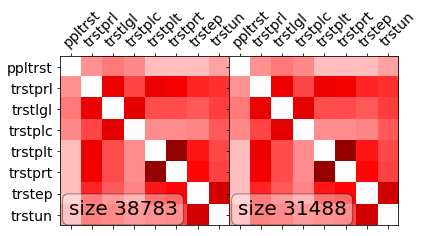

0.7966148584310758 125 357
elgnuc=='A small amount' AND rdcenr=='Never' 
 occinfr=='Low, extremely unfair' AND sofrprv=='Neither agree nor disagree'
0


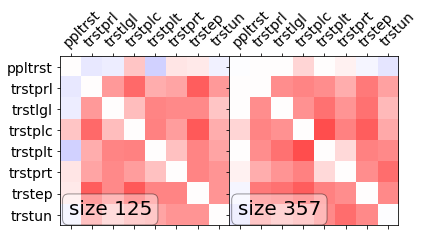

0.637734706235855 335 840
rdcenr=='Hardly ever' AND wrntdis=='Not at all worried' 
 evmar=='Yes' AND wltdffr=='Small, extremely unfair'
3


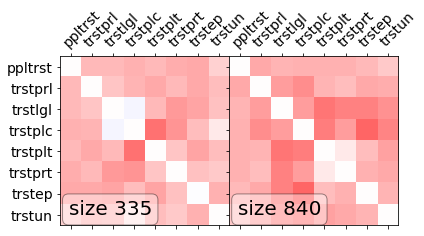

0.632273380726139 304 202
mnrgtjb=='Agree' AND wrdpfos=='Not at all worried' 
 gvintcz=='Not at all' AND ifredu=='4'
5


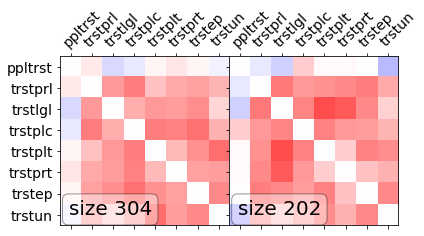

0.6255916658788551 429 866
ccgdbd=='6' AND inctxff=='Somewhat in favour' 
 bthcld=='Yes' AND wltdffr=='Small, extremely unfair'
8


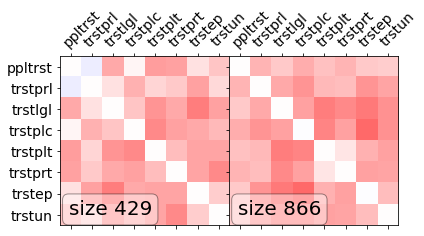

0.6162137280375125 186 844
clmchng=='Definitely not changing' AND gvrfgap=='Agree' 
 btminfr=='Low, extremely unfair' AND wltdffr=='Small, extremely unfair'
9


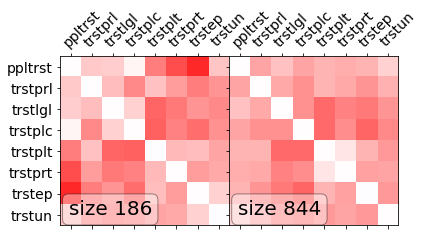

0.5815941225645408 352 408
gvsrdcc=='1' AND wrdpimp=='Very worried' 
 plnftr=='3' AND wltdffr=='Large, extremely unfair'
20


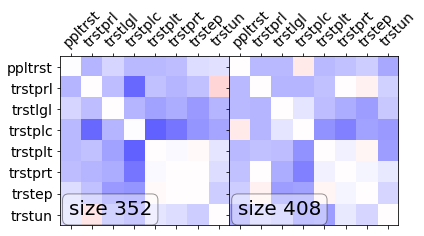

0.579555334750421 110 141
elgnuc=='A large amount' AND wrinspw=='Extremely worried' 
 frlneti>=25000.0 AND ppldsrv=='Agree strongly'
22


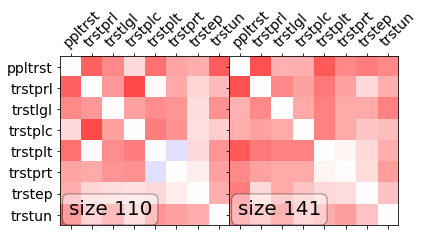

0.5772044582774025 343 273
mnrgtjb=='Agree' AND wrntdis=='Not at all worried' 
 ifredu=='5' AND occinfr=='Low, extremely unfair'
23


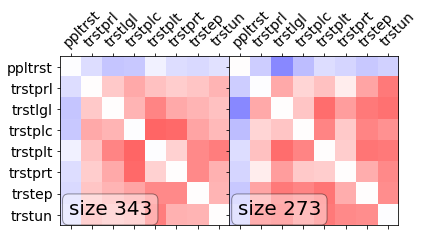

In [46]:
the_diag= np.diag( [1,1,1,1,1,1,1,1])
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'wspace': 0})

vmin = -0.8
vmax = 0.8


def add_text(ax, text):
    props = dict(boxstyle='round', facecolor='white', alpha=0.4)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.15, text,transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

def apply_formatting(ax1, ax2, labels):
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels)
    ax1.set_yticklabels(labels)
    

    
    
    ax2.set_xticks(np.arange(len(labels)))
    ax2.set_yticks(np.arange(len(labels)))
    
    ax2.set_xticklabels(labels)
    ax2.set_yticklabels(labels)
    ax1.label_outer()
    ax2.label_outer()
    ax1.tick_params(axis='x', labelsize= 14)
    ax1.tick_params(axis='y', labelsize= 14)
    ax2.tick_params(axis='x', labelsize= 14)
    
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='left', rotation_mode="anchor")
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode="anchor")

fit_0_L=corr_m.fit(slice(None), df1).correlation_matrix
ax1.matshow(fit_0_L-the_diag,cmap='seismic',vmin=vmin, vmax=vmax)
fit_0_R=corr_m.fit(slice(None), df2).correlation_matrix
ax2.matshow(fit_0_R-the_diag,cmap='seismic',vmin=vmin, vmax=vmax)
apply_formatting(ax1, ax2, trust_columns)
add_text(ax1, f'size {len(df1)}')
add_text(ax2, f'size {len(df2)}')
fig.tight_layout()
fig.savefig("L:/experiments/ESS/dataset.png",bbox='tight',bbox_inches = 'tight', pad_inches = 0)
plt.show()
    #print(np.min(arr))
    #print(np.sum(np.abs(arr)))
    #print(np.linalg.norm(arr.flatten(),ord=1))
    #
result2=list(reversed(result))

avoid_L = set()
avoid_R = set()
n_pairs = 8
for place, (q, tpl) in enumerate(result2):
    if (str(tpl[0]) in avoid_L) or (str(tpl[1]) in avoid_R):
        continue
    avoid_L.add(str(tpl[0]))
    avoid_R.add(str(tpl[1]))
    
    #if not 'isnull' in repr(tpl[0]):
    print(q, tpl[2].size_sg, tpl[3].size_sg)
    print(tpl[0], "\r\n" ,tpl[1])
    print(place)
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'wspace': 0})
    arr_L=(tpl[2].correlation_matrix-(fit_0_L+fit_0_R)/2)
    
    arr_R=(tpl[3].correlation_matrix-(fit_0_L+fit_0_R)/2)
    
    ax1.matshow(arr_L, vmin=vmin, vmax=vmax, cmap='seismic')
    ax2.matshow(arr_R, vmin=vmin, vmax=vmax, cmap='seismic')
    
    add_text(ax1, f'size {tpl[2].size_sg}')
    add_text(ax2, f'size {tpl[3].size_sg}')


    
    apply_formatting(ax1, ax2, trust_columns)
    fig.tight_layout()
    fig.savefig(f"L:/experiments/ESS/seismic2_{place}.png",bbox='tight',bbox_inches = 'tight', pad_inches = 0)
    
    with open(f"L:/experiments/ESS/seismic2_{place}.txt",'w') as f:
        f.write(str(tpl[0])+ "\r\n" +str(tpl[1]))
        
    

    #fig.show()
    plt.show()
    if len(avoid_L)>=n_pairs:
        break
    



In [31]:
sels_8=discard_null(create_8_selectors(df_8, ignore=trust_columns))
sels_8

[name=='ESS8e02_1',
 edition=='2.1',
 proddate=='01.12.2018',
 cntry=='Austria',
 cntry=='Belgium',
 cntry=='Switzerland',
 cntry=='Czechia',
 cntry=='Germany',
 cntry=='Estonia',
 cntry=='Spain',
 cntry=='Finland',
 cntry=='France',
 cntry=='United Kingdom',
 cntry=='Hungary',
 cntry=='Ireland',
 cntry=='Israel',
 cntry=='Iceland',
 cntry=='Italy',
 cntry=='Lithuania',
 cntry=='Netherlands',
 cntry=='Norway',
 cntry=='Poland',
 cntry=='Portugal',
 cntry=='Russian Federation',
 cntry=='Sweden',
 cntry=='Slovenia',
 nwspol==120.0,
 nwspol==30.0,
 nwspol==60.0,
 nwspol==15.0,
 nwspol==45.0,
 nwspol==10.0,
 nwspol==90.0,
 nwspol==20.0,
 nwspol==40.0,
 nwspol==35.0,
 nwspol==1.0,
 nwspol==180.0,
 nwspol==5.0,
 nwspol==25.0,
 nwspol==360.0,
 nwspol==0.0,
 nwspol==160.0,
 nwspol==135.0,
 nwspol==2.0,
 nwspol==50.0,
 nwspol==150.0,
 nwspol==75.0,
 nwspol==105.0,
 nwspol==55.0,
 nwspol==240.0,
 nwspol==300.0,
 nwspol==600.0,
 nwspol==100.0,
 nwspol==80.0,
 nwspol==65.0,
 nwspol==85.0,
 nwspol=

Text(0, 0.5, 'quality')

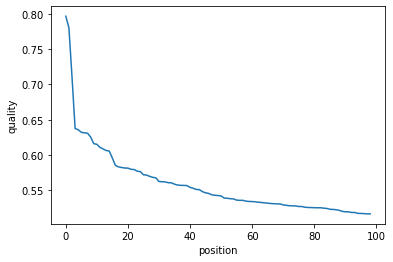

In [32]:
qualities = []
for tpl in result2:
    qualities.append(tpl[0])
    
plt.plot(qualities[:99])
#plt.yscale('log')
plt.xlabel("position")
plt.ylabel("quality")
#plt.savefig("L:/experiments"/Path('matplotlib_images')/'quality_distibution_ESS.png',bbox='tight',bbox_inches = 'tight', pad_inches = 0)

In [33]:
df1.columns

Index(['ppltrst', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt',
       'trstep', 'trstun', 'eneffap', 'cflsenr', 'elgcoal', 'elgngas',
       'elghydr', 'elgnuc', 'elgsun', 'elgwind', 'elgbio', 'wrpwrct',
       'wrenexp', 'wrdpimp', 'wrdpfos', 'wrntdis', 'wrinspw', 'wrtcfl',
       'wrtratc', 'wrclmch', 'clmchng', 'clmthgt2', 'ccrdprs', 'ccgdbd',
       'lkredcc', 'lklmten', 'gvsrdcc', 'ownrdcc', 'inctxff', 'sbsrnen',
       'banhhap', 'rdcenr', 'rfgfrpc', 'gvrfgap', 'mnrgtjb', 'rfgbfml',
       'ccnthum'],
      dtype='object')

In [34]:
print(cb_8_flat['lklmten'])
print(cb_8_flat['gvrfgap'])
print(cb_8_flat['mnrgtjb'])
print(cb_8_flat['clmchng'])

How likely, large numbers of people limit energy use
Government should be generous judging applications for refugee status
Men should have more right to job than women when jobs are scarce
Do you think world's climate is changing


In [35]:
print(cb_9_flat['evlvptn'])
print(cb_9_flat['evpdemp'])
print(cb_9_flat['occinfr'])

Ever lived with a spouse or partner for 3 months or more
Paid employment or apprenticeship at least 3 months 20 hours weekly
Net [pay/pensions/social benefits] of people same occupation as you in country, how fair


In [36]:
df_8_trust = df_8[trust_columns]

In [37]:
from tqdm import tqdm_notebook
def calc_p_value(df_L, df_R, size_l, size_r, ex_qfs, sim_qf, final_qf,  repetitions):
    ex_l, ex_r = ex_qfs
    l=np.arange(len(df_L))
    r=np.arange(len(df_R))
    qualities = np.zeros(repetitions)
    size_factor =  min(size_l/len(df_L), size_r/len(df_R))
    f_qf = functools.partial(final_qf,alpha,beta)
    for i in tqdm_notebook(range(repetitions)):
        np.random.shuffle(l)
        np.random.shuffle(r)
        sg_l = l[:size_l]
        sg_r = r[:size_r]
        stats_l = sim_qf.calculate_statistics(sg_l, side=0)
        stats_r = sim_qf.calculate_statistics(sg_r, side=1)
        sim = sim_qf.evaluate(sg_l, sg_r, stats_l, stats_r)
        ex = min(ex_l.evaluate(sg_l, df_L), ex_r.evaluate(sg_r, df_R))
        qualities[i] = f_qf(size_factor, ex, sim )
    return qualities

In [38]:

quals = calc_p_value(df1, df2, 743, 663, (qf, qf2), sim_qf,final_qf, 10000)

<ipython-input-37-9fb17974eb90>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(repetitions)):


AttributeError: 'NoneType' object has no attribute 'size_sg'

In [ ]:
plt.hist(quals, bins=40)

In [ ]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(quals,  fit=norm, kde=False)

In [ ]:
fit_res = norm.fit(quals)
print(fit_res)

In [ ]:
np.mean(quals)

In [ ]:
# quad exponential dropoff
norm.pdf(0.87,*fit_res)*25*10**3

In [ ]:
# exponential dropoff
np.exp(-abs(0.87-fit_res[0])/fit_res[1])*25*10**3

In [ ]:
#quadratic dropoff
((0.87-fit_res[0])**2/fit_res[1]/fit_res[1])**(-1)*25*10**3